In [2]:
import bct
import numpy as np
from tqdm import tqdm
%matplotlib inline
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from astropy.table import Table
from importlib import reload
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.colors import LogNorm
from decimal import *
import sys
from scipy.ndimage import zoom 

Populating the interactive namespace from numpy and matplotlib


### Read in trees

In [4]:
outfile='binaries/trees_099.0'
# outfile='binaries/500/cutLJ_FOF.0'
trees=bct.read_binary(outfile)

mOutfile='/home/kmaamari/MLG/MergerTrees/MR/treedata/trees_063.5'
# mOutfile='binaries/Millenium/cutMill500_1.0'
mTrees=bct.read_binary(mOutfile)

mOutfile2='binaries/Millenium/cutMill500_2.0'
mTrees2=bct.read_binary(mOutfile2)

mOutfile3='binaries/Millenium/cutMill500_3.0'
mTrees3=bct.read_binary(mOutfile3)

mOutfile4='binaries/Millenium/cutMill500_4.0'
mTrees4=bct.read_binary(mOutfile4)

mOutfile5='binaries/Millenium/cutMill500_5.0'
mTrees5=bct.read_binary(mOutfile5)

  0%|          | 59/28987 [00:00<00:53, 540.84it/s]

Read 81776 trees with total 4107266 halos


  0%|          | 0/619 [00:00<?, ?it/s]

Read 28987 trees with total 1500436 halos
Read 874 trees with total 21403 halos


100%|██████████| 741/741 [00:00<00:00, 17308.48it/s]

Read 619 trees with total 14686 halos
Read 742 trees with total 18299 halos
Read 741 trees with total 17479 halos


### SnapNums and associated redshifts

In [5]:
'''
LJDS
-----
42, 3
54, 2
71, 1
75, 0.82
80, 0.62
91, 0.24
100, 0
'''
zLJDS = [100,91,80,75,71,54,42]

'''
Millennium
----------
27, 3
32, 2
40, 1
43, 0.82
46, 0.62
54, 0.24
63, 0
'''
zMill = [63,54,46,43,40,32,27]

### Read quantitites

In [6]:
Len=5
M_Crit200=7
M_Mean200=6
Velx=12
VelDisp=15
Vmax=16
Spin_x=17
SnapNum=21

leng = []
mcrit = []
mmean = []
snum = []

vx0 = []
vx024 = []
vx062 = []
vx082 = []
vx1 = []

vdis0 = []
vdis024 = []
vdis062 = []
vdis082 = []
vdis1 = []
vdis2 = []
vdis3 = []

vmax0 = []
vmax024 = []
vmax062 = []
vmax082 = []
vmax1 = []
vmax2 = []
vmax3 = []

spin0 = []
spin024 = []
spin062 = []
spin082 = []
spin1 = []
spin2 = []
spin3 = []


count=0
count2=0
for i in tqdm(range(len(trees))):
    count+=1
    if count%3!=0: continue
    count2+=1
    for j in range(len(trees[i])):
        mcrit.append(trees[i][j][M_Crit200]*1e10)
        leng.append(trees[i][j][Len]*1.3e9)
        
        if trees[i][j][SnapNum]==zLJDS[0] and trees[i][j][M_Crit200]*1e10!=0.0:
            vdis0.append(trees[i][j][VelDisp])
            vmax0.append(trees[i][j][Vmax])
            spin0.append(sqrt(trees[i][j][Spin_x]**2+trees[i][j][Spin_x+1]**2+trees[i][j][Spin_x+2]**2))   
            vx0.append(sqrt(trees[i][j][Velx]**2+trees[i][j][Velx+1]**2+trees[i][j][Velx+2]**2))
            
        if trees[i][j][SnapNum]==zLJDS[1] and trees[i][j][M_Crit200]*1e10!=0.0:
            vdis024.append(trees[i][j][VelDisp])
            vmax024.append(trees[i][j][Vmax])
            spin024.append(sqrt(trees[i][j][Spin_x]**2+trees[i][j][Spin_x+1]**2+trees[i][j][Spin_x+2]**2))      
            vx024.append(sqrt(trees[i][j][Velx]**2+trees[i][j][Velx+1]**2+trees[i][j][Velx+2]**2))
            
        if trees[i][j][SnapNum]==zLJDS[2] and trees[i][j][M_Crit200]*1e10!=0.0:
            vdis062.append(trees[i][j][VelDisp])
            vmax062.append(trees[i][j][Vmax])
            spin062.append(sqrt(trees[i][j][Spin_x]**2+trees[i][j][Spin_x+1]**2+trees[i][j][Spin_x+2]**2))
            vx062.append(sqrt(trees[i][j][Velx]**2+trees[i][j][Velx+1]**2+trees[i][j][Velx+2]**2))
        
        if trees[i][j][SnapNum]==zLJDS[3] and trees[i][j][M_Crit200]*1e10!=0.0:
            vdis082.append(trees[i][j][VelDisp])
            vmax082.append(trees[i][j][Vmax])
            spin082.append(sqrt(trees[i][j][Spin_x]**2+trees[i][j][Spin_x+1]**2+trees[i][j][Spin_x+2]**2))      
            vx082.append(sqrt(trees[i][j][Velx]**2+trees[i][j][Velx+1]**2+trees[i][j][Velx+2]**2))
        
        if trees[i][j][SnapNum]==zLJDS[4] and trees[i][j][M_Crit200]*1e10!=0.0:
            vdis1.append(trees[i][j][VelDisp])
            vmax1.append(trees[i][j][Vmax])
            spin1.append(sqrt(trees[i][j][Spin_x]**2+trees[i][j][Spin_x+1]**2+trees[i][j][Spin_x+2]**2))     
            vx1.append(sqrt(trees[i][j][Velx]**2+trees[i][j][Velx+1]**2+trees[i][j][Velx+2]**2))
            
        if trees[i][j][SnapNum]==zLJDS[5] and trees[i][j][M_Crit200]*1e10!=0.0:
            vdis2.append(trees[i][j][VelDisp])
            vmax2.append(trees[i][j][Vmax])
            spin2.append(sqrt(trees[i][j][Spin_x]**2+trees[i][j][Spin_x+1]**2+trees[i][j][Spin_x+2]**2))
        
        if trees[i][j][SnapNum]==zLJDS[6] and trees[i][j][M_Crit200]*1e10!=0.0:
            vdis3.append(trees[i][j][VelDisp])
            vmax3.append(trees[i][j][Vmax])
            spin3.append(sqrt(trees[i][j][Spin_x]**2+trees[i][j][Spin_x+1]**2+trees[i][j][Spin_x+2]**2))                 

100%|██████████| 81776/81776 [00:35<00:00, 2280.58it/s]


In [7]:
mleng = []
mmcrit = []
mmmean = []
msnum = []

mvx0 = []
mvx024 = []
mvx062 = []
mvx082 = []
mvx1 = []

mvdis0 = []
mvdis024 = []
mvdis062 = []
mvdis082 = []
mvdis1 = []
mvdis2 = []
mvdis3 = []

mvmax0 = []
mvmax024 = []
mvmax062 = []
mvmax082 = []
mvmax1 = []
mvmax2 = []
mvmax3 = []

mspin0 = []
mspin024 = []
mspin062 = []
mspin082 = []
mspin1 = []
mspin2 = []
mspin3 = []


count = 0
for j in tqdm(range(len(mTrees))):
    for k in range(len(mTrees[j])):
        mmcrit.append(mTrees[j][k][M_Crit200]*(1e10))
        mleng.append(mTrees[j][k][Len]*8.6e8)
        
        if mTrees[j][k][SnapNum]==zMill[0] and mTrees[j][k][M_Crit200]*1e10!=0.0:
            mvdis0.append(mTrees[j][k][VelDisp])
            mvmax0.append(mTrees[j][k][Vmax])
            mspin0.append(sqrt(mTrees[j][k][Spin_x]**2+mTrees[j][k][Spin_x+1]**2+mTrees[j][k][Spin_x+2]**2)) 
            mvx0.append(sqrt(mTrees[j][k][Velx]**2+mTrees[j][k][Velx+1]**2+mTrees[j][k][Velx+2]**2))
            
        if mTrees[j][k][SnapNum]==zMill[1] and mTrees[j][k][M_Crit200]*1e10!=0.0:
            mvdis024.append(mTrees[j][k][VelDisp])
            mvmax024.append(mTrees[j][k][Vmax])
            mspin024.append(sqrt(mTrees[j][k][Spin_x]**2+mTrees[j][k][Spin_x+1]**2+mTrees[j][k][Spin_x+2]**2))      
            mvx024.append(sqrt(mTrees[j][k][Velx]**2+mTrees[j][k][Velx+1]**2+mTrees[j][k][Velx+2]**2))
        
        if mTrees[j][k][SnapNum]==zMill[2] and mTrees[j][k][M_Crit200]*1e10!=0.0:
            mvdis062.append(mTrees[j][k][VelDisp])
            mvmax062.append(mTrees[j][k][Vmax])
            mspin062.append(sqrt(mTrees[j][k][Spin_x]**2+mTrees[j][k][Spin_x+1]**2+mTrees[j][k][Spin_x+2]**2))      
            mvx062.append(sqrt(mTrees[j][k][Velx]**2+mTrees[j][k][Velx+1]**2+mTrees[j][k][Velx+2]**2))
        
        if mTrees[j][k][SnapNum]==zMill[3] and mTrees[j][k][M_Crit200]*1e10!=0.0:
            mvdis082.append(mTrees[j][k][VelDisp])
            mvmax082.append(mTrees[j][k][Vmax])
            mspin082.append(sqrt(mTrees[j][k][Spin_x]**2+mTrees[j][k][Spin_x+1]**2+mTrees[j][k][Spin_x+2]**2))      
            mvx082.append(sqrt(mTrees[j][k][Velx]**2+mTrees[j][k][Velx+1]**2+mTrees[j][k][Velx+2]**2))
        
        if mTrees[j][k][SnapNum]==zMill[4] and mTrees[j][k][M_Crit200]*1e10!=0.0:
            mvdis1.append(mTrees[j][k][VelDisp])
            mvmax1.append(mTrees[j][k][Vmax])
            mspin1.append(sqrt(mTrees[j][k][Spin_x]**2+mTrees[j][k][Spin_x+1]**2+mTrees[j][k][Spin_x+2]**2))     
            mvx1.append(sqrt(mTrees[j][k][Velx]**2+mTrees[j][k][Velx+1]**2+mTrees[j][k][Velx+2]**2))
        
        if mTrees[j][k][SnapNum]==zMill[5] and mTrees[j][k][M_Crit200]*1e10!=0.0:
            mvdis2.append(mTrees[j][k][VelDisp])
            mvmax2.append(mTrees[j][k][Vmax])
            mspin2.append(sqrt(mTrees[j][k][Spin_x]**2+mTrees[j][k][Spin_x+1]**2+mTrees[j][k][Spin_x+2]**2))      
        
        if mTrees[j][k][SnapNum]==zMill[6] and mTrees[j][k][M_Crit200]*1e10!=0.0:
            mvdis3.append(mTrees[j][k][VelDisp])
            mvmax3.append(mTrees[j][k][Vmax])
            mspin3.append(sqrt(mTrees[j][k][Spin_x]**2+mTrees[j][k][Spin_x+1]**2+mTrees[j][k][Spin_x+2]**2))                  
            
# count = 0
# for j in tqdm(range(len(mTrees2))):
#     for k in range(len(mTrees2[j])):
#         mmcrit.append(mTrees2[j][k][M_Crit200]*(1e10))
#         mleng.append(mTrees2[j][k][Len]*8.6e8)
        
#         if mTrees2[j][k][SnapNum]==zMill[0] and mTrees2[j][k][M_Crit200]*1e10!=0.0:
#             mvdis0.append(mTrees2[j][k][VelDisp])
#             mvmax0.append(mTrees2[j][k][Vmax])
#             mspin0.append(sqrt(mTrees2[j][k][Spin_x]**2+mTrees2[j][k][Spin_x+1]**2+mTrees2[j][k][Spin_x+2]**2)) 
#             mvx0.append(sqrt(mTrees2[j][k][Velx]**2+mTrees2[j][k][Velx+1]**2+mTrees2[j][k][Velx+2]**2))
            
#         if mTrees2[j][k][SnapNum]==zMill[1] and mTrees2[j][k][M_Crit200]*1e10!=0.0:
#             mvdis024.append(mTrees2[j][k][VelDisp])
#             mvmax024.append(mTrees2[j][k][Vmax])
#             mspin024.append(sqrt(mTrees2[j][k][Spin_x]**2+mTrees2[j][k][Spin_x+1]**2+mTrees2[j][k][Spin_x+2]**2))      
#             mvx024.append(sqrt(mTrees2[j][k][Velx]**2+mTrees2[j][k][Velx+1]**2+mTrees2[j][k][Velx+2]**2))
        
#         if mTrees2[j][k][SnapNum]==zMill[2] and mTrees2[j][k][M_Crit200]*1e10!=0.0:
#             mvdis062.append(mTrees2[j][k][VelDisp])
#             mvmax062.append(mTrees2[j][k][Vmax])
#             mspin062.append(sqrt(mTrees2[j][k][Spin_x]**2+mTrees2[j][k][Spin_x+1]**2+mTrees2[j][k][Spin_x+2]**2))      
#             mvx062.append(sqrt(mTrees2[j][k][Velx]**2+mTrees2[j][k][Velx+1]**2+mTrees2[j][k][Velx+2]**2))
        
#         if mTrees2[j][k][SnapNum]==zMill[3] and mTrees2[j][k][M_Crit200]*1e10!=0.0:
#             mvdis082.append(mTrees2[j][k][VelDisp])
#             mvmax082.append(mTrees2[j][k][Vmax])
#             mspin082.append(sqrt(mTrees2[j][k][Spin_x]**2+mTrees2[j][k][Spin_x+1]**2+mTrees2[j][k][Spin_x+2]**2))      
#             mvx082.append(sqrt(mTrees2[j][k][Velx]**2+mTrees2[j][k][Velx+1]**2+mTrees2[j][k][Velx+2]**2))
        
#         if mTrees2[j][k][SnapNum]==zMill[4] and mTrees2[j][k][M_Crit200]*1e10!=0.0:
#             mvdis1.append(mTrees2[j][k][VelDisp])
#             mvmax1.append(mTrees2[j][k][Vmax])
#             mspin1.append(sqrt(mTrees2[j][k][Spin_x]**2+mTrees2[j][k][Spin_x+1]**2+mTrees2[j][k][Spin_x+2]**2))     
#             mvx1.append(sqrt(mTrees2[j][k][Velx]**2+mTrees2[j][k][Velx+1]**2+mTrees2[j][k][Velx+2]**2))
        
#         if mTrees2[j][k][SnapNum]==zMill[5] and mTrees2[j][k][M_Crit200]*1e10!=0.0:
#             mvdis2.append(mTrees2[j][k][VelDisp])
#             mvmax2.append(mTrees2[j][k][Vmax])
#             mspin2.append(sqrt(mTrees2[j][k][Spin_x]**2+mTrees2[j][k][Spin_x+1]**2+mTrees2[j][k][Spin_x+2]**2))      
        
#         if mTrees2[j][k][SnapNum]==zMill[6] and mTrees2[j][k][M_Crit200]*1e10!=0.0:
#             mvdis3.append(mTrees2[j][k][VelDisp])
#             mvmax3.append(mTrees2[j][k][Vmax])
#             mspin3.append(sqrt(mTrees2[j][k][Spin_x]**2+mTrees2[j][k][Spin_x+1]**2+mTrees2[j][k][Spin_x+2]**2))                  
            
# count = 0
# for j in tqdm(range(len(mTrees3))):
#     for k in range(len(mTrees3[j])):
#         mmcrit.append(mTrees3[j][k][M_Crit200]*(1e10))
#         mleng.append(mTrees3[j][k][Len]*8.6e8)
        
#         if mTrees3[j][k][SnapNum]==zMill[0] and mTrees3[j][k][M_Crit200]*1e10!=0.0:
#             mvdis0.append(mTrees3[j][k][VelDisp])
#             mvmax0.append(mTrees3[j][k][Vmax])
#             mspin0.append(sqrt(mTrees3[j][k][Spin_x]**2+mTrees3[j][k][Spin_x+1]**2+mTrees3[j][k][Spin_x+2]**2)) 
#             mvx0.append(sqrt(mTrees3[j][k][Velx]**2+mTrees3[j][k][Velx+1]**2+mTrees3[j][k][Velx+2]**2))
            
#         if mTrees3[j][k][SnapNum]==zMill[1] and mTrees3[j][k][M_Crit200]*1e10!=0.0:
#             mvdis024.append(mTrees3[j][k][VelDisp])
#             mvmax024.append(mTrees3[j][k][Vmax])
#             mspin024.append(sqrt(mTrees3[j][k][Spin_x]**2+mTrees3[j][k][Spin_x+1]**2+mTrees3[j][k][Spin_x+2]**2))      
#             mvx024.append(sqrt(mTrees3[j][k][Velx]**2+mTrees3[j][k][Velx+1]**2+mTrees3[j][k][Velx+2]**2))
        
#         if mTrees3[j][k][SnapNum]==zMill[2] and mTrees3[j][k][M_Crit200]*1e10!=0.0:
#             mvdis062.append(mTrees3[j][k][VelDisp])
#             mvmax062.append(mTrees3[j][k][Vmax])
#             mspin062.append(sqrt(mTrees3[j][k][Spin_x]**2+mTrees3[j][k][Spin_x+1]**2+mTrees3[j][k][Spin_x+2]**2))      
#             mvx062.append(sqrt(mTrees3[j][k][Velx]**2+mTrees3[j][k][Velx+1]**2+mTrees3[j][k][Velx+2]**2))
        
#         if mTrees3[j][k][SnapNum]==zMill[3] and mTrees3[j][k][M_Crit200]*1e10!=0.0:
#             mvdis082.append(mTrees3[j][k][VelDisp])
#             mvmax082.append(mTrees3[j][k][Vmax])
#             mspin082.append(sqrt(mTrees3[j][k][Spin_x]**2+mTrees3[j][k][Spin_x+1]**2+mTrees3[j][k][Spin_x+2]**2))      
#             mvx082.append(sqrt(mTrees3[j][k][Velx]**2+mTrees3[j][k][Velx+1]**2+mTrees3[j][k][Velx+2]**2))
        
#         if mTrees3[j][k][SnapNum]==zMill[4] and mTrees3[j][k][M_Crit200]*1e10!=0.0:
#             mvdis1.append(mTrees3[j][k][VelDisp])
#             mvmax1.append(mTrees3[j][k][Vmax])
#             mspin1.append(sqrt(mTrees3[j][k][Spin_x]**2+mTrees3[j][k][Spin_x+1]**2+mTrees3[j][k][Spin_x+2]**2))     
#             mvx1.append(sqrt(mTrees3[j][k][Velx]**2+mTrees3[j][k][Velx+1]**2+mTrees3[j][k][Velx+2]**2))
        
#         if mTrees3[j][k][SnapNum]==zMill[5] and mTrees3[j][k][M_Crit200]*1e10!=0.0:
#             mvdis2.append(mTrees3[j][k][VelDisp])
#             mvmax2.append(mTrees3[j][k][Vmax])
#             mspin2.append(sqrt(mTrees3[j][k][Spin_x]**2+mTrees3[j][k][Spin_x+1]**2+mTrees3[j][k][Spin_x+2]**2))      
        
#         if mTrees3[j][k][SnapNum]==zMill[6] and mTrees3[j][k][M_Crit200]*1e10!=0.0:
#             mvdis3.append(mTrees3[j][k][VelDisp])
#             mvmax3.append(mTrees3[j][k][Vmax])
#             mspin3.append(sqrt(mTrees3[j][k][Spin_x]**2+mTrees3[j][k][Spin_x+1]**2+mTrees3[j][k][Spin_x+2]**2))                              

# count = 0
# for j in tqdm(range(len(mTrees4))):
#     for k in range(len(mTrees4[j])):
#         mmcrit.append(mTrees4[j][k][M_Crit200]*(1e10))
#         mleng.append(mTrees4[j][k][Len]*8.6e8)
        
#         if mTrees4[j][k][SnapNum]==zMill[0] and mTrees4[j][k][M_Crit200]*1e10!=0.0:
#             mvdis0.append(mTrees4[j][k][VelDisp])
#             mvmax0.append(mTrees4[j][k][Vmax])
#             mspin0.append(sqrt(mTrees4[j][k][Spin_x]**2+mTrees4[j][k][Spin_x+1]**2+mTrees4[j][k][Spin_x+2]**2)) 
#             mvx0.append(sqrt(mTrees4[j][k][Velx]**2+mTrees4[j][k][Velx+1]**2+mTrees4[j][k][Velx+2]**2))
            
#         if mTrees4[j][k][SnapNum]==zMill[1] and mTrees4[j][k][M_Crit200]*1e10!=0.0:
#             mvdis024.append(mTrees4[j][k][VelDisp])
#             mvmax024.append(mTrees4[j][k][Vmax])
#             mspin024.append(sqrt(mTrees4[j][k][Spin_x]**2+mTrees4[j][k][Spin_x+1]**2+mTrees4[j][k][Spin_x+2]**2))      
#             mvx024.append(sqrt(mTrees4[j][k][Velx]**2+mTrees4[j][k][Velx+1]**2+mTrees4[j][k][Velx+2]**2))
        
#         if mTrees4[j][k][SnapNum]==zMill[2] and mTrees4[j][k][M_Crit200]*1e10!=0.0:
#             mvdis062.append(mTrees4[j][k][VelDisp])
#             mvmax062.append(mTrees4[j][k][Vmax])
#             mspin062.append(sqrt(mTrees4[j][k][Spin_x]**2+mTrees4[j][k][Spin_x+1]**2+mTrees4[j][k][Spin_x+2]**2))      
#             mvx062.append(sqrt(mTrees4[j][k][Velx]**2+mTrees4[j][k][Velx+1]**2+mTrees4[j][k][Velx+2]**2))
        
#         if mTrees4[j][k][SnapNum]==zMill[3] and mTrees4[j][k][M_Crit200]*1e10!=0.0:
#             mvdis082.append(mTrees4[j][k][VelDisp])
#             mvmax082.append(mTrees4[j][k][Vmax])
#             mspin082.append(sqrt(mTrees4[j][k][Spin_x]**2+mTrees4[j][k][Spin_x+1]**2+mTrees4[j][k][Spin_x+2]**2))      
#             mvx082.append(sqrt(mTrees4[j][k][Velx]**2+mTrees4[j][k][Velx+1]**2+mTrees4[j][k][Velx+2]**2))
        
#         if mTrees4[j][k][SnapNum]==zMill[4] and mTrees4[j][k][M_Crit200]*1e10!=0.0:
#             mvdis1.append(mTrees4[j][k][VelDisp])
#             mvmax1.append(mTrees4[j][k][Vmax])
#             mspin1.append(sqrt(mTrees4[j][k][Spin_x]**2+mTrees4[j][k][Spin_x+1]**2+mTrees4[j][k][Spin_x+2]**2))     
#             mvx1.append(sqrt(mTrees4[j][k][Velx]**2+mTrees4[j][k][Velx+1]**2+mTrees4[j][k][Velx+2]**2))
        
#         if mTrees4[j][k][SnapNum]==zMill[5] and mTrees4[j][k][M_Crit200]*1e10!=0.0:
#             mvdis2.append(mTrees4[j][k][VelDisp])
#             mvmax2.append(mTrees4[j][k][Vmax])
#             mspin2.append(sqrt(mTrees4[j][k][Spin_x]**2+mTrees4[j][k][Spin_x+1]**2+mTrees4[j][k][Spin_x+2]**2))      
        
#         if mTrees4[j][k][SnapNum]==zMill[6] and mTrees4[j][k][M_Crit200]*1e10!=0.0:
#             mvdis3.append(mTrees4[j][k][VelDisp])
#             mvmax3.append(mTrees4[j][k][Vmax])
#             mspin3.append(sqrt(mTrees4[j][k][Spin_x]**2+mTrees4[j][k][Spin_x+1]**2+mTrees4[j][k][Spin_x+2]**2))                              
            
# count = 0
# for j in tqdm(range(len(mTrees5))):
#     for k in range(len(mTrees5[j])):
#         mmcrit.append(mTrees5[j][k][M_Crit200]*(1e10))
#         mleng.append(mTrees5[j][k][Len]*8.6e8)
        
#         if mTrees5[j][k][SnapNum]==zMill[0] and mTrees5[j][k][M_Crit200]*1e10!=0.0:
#             mvdis0.append(mTrees5[j][k][VelDisp])
#             mvmax0.append(mTrees5[j][k][Vmax])
#             mspin0.append(sqrt(mTrees5[j][k][Spin_x]**2+mTrees5[j][k][Spin_x+1]**2+mTrees5[j][k][Spin_x+2]**2)) 
#             mvx0.append(sqrt(mTrees5[j][k][Velx]**2+mTrees5[j][k][Velx+1]**2+mTrees5[j][k][Velx+2]**2))
            
#         if mTrees5[j][k][SnapNum]==zMill[1] and mTrees5[j][k][M_Crit200]*1e10!=0.0:
#             mvdis024.append(mTrees5[j][k][VelDisp])
#             mvmax024.append(mTrees5[j][k][Vmax])
#             mspin024.append(sqrt(mTrees5[j][k][Spin_x]**2+mTrees5[j][k][Spin_x+1]**2+mTrees5[j][k][Spin_x+2]**2))      
#             mvx024.append(sqrt(mTrees5[j][k][Velx]**2+mTrees5[j][k][Velx+1]**2+mTrees5[j][k][Velx+2]**2))
        
#         if mTrees5[j][k][SnapNum]==zMill[2] and mTrees5[j][k][M_Crit200]*1e10!=0.0:
#             mvdis062.append(mTrees5[j][k][VelDisp])
#             mvmax062.append(mTrees5[j][k][Vmax])
#             mspin062.append(sqrt(mTrees5[j][k][Spin_x]**2+mTrees5[j][k][Spin_x+1]**2+mTrees5[j][k][Spin_x+2]**2))      
#             mvx062.append(sqrt(mTrees5[j][k][Velx]**2+mTrees5[j][k][Velx+1]**2+mTrees5[j][k][Velx+2]**2))
        
#         if mTrees5[j][k][SnapNum]==zMill[3] and mTrees5[j][k][M_Crit200]*1e10!=0.0:
#             mvdis082.append(mTrees5[j][k][VelDisp])
#             mvmax082.append(mTrees5[j][k][Vmax])
#             mspin082.append(sqrt(mTrees5[j][k][Spin_x]**2+mTrees5[j][k][Spin_x+1]**2+mTrees5[j][k][Spin_x+2]**2))      
#             mvx082.append(sqrt(mTrees5[j][k][Velx]**2+mTrees5[j][k][Velx+1]**2+mTrees5[j][k][Velx+2]**2))
        
#         if mTrees5[j][k][SnapNum]==zMill[4] and mTrees5[j][k][M_Crit200]*1e10!=0.0:
#             mvdis1.append(mTrees5[j][k][VelDisp])
#             mvmax1.append(mTrees5[j][k][Vmax])
#             mspin1.append(sqrt(mTrees5[j][k][Spin_x]**2+mTrees5[j][k][Spin_x+1]**2+mTrees5[j][k][Spin_x+2]**2))     
#             mvx1.append(sqrt(mTrees5[j][k][Velx]**2+mTrees5[j][k][Velx+1]**2+mTrees5[j][k][Velx+2]**2))
        
#         if mTrees5[j][k][SnapNum]==zMill[5] and mTrees5[j][k][M_Crit200]*1e10!=0.0:
#             mvdis2.append(mTrees5[j][k][VelDisp])
#             mvmax2.append(mTrees5[j][k][Vmax])
#             mspin2.append(sqrt(mTrees5[j][k][Spin_x]**2+mTrees5[j][k][Spin_x+1]**2+mTrees5[j][k][Spin_x+2]**2))      
        
#         if mTrees5[j][k][SnapNum]==zMill[6] and mTrees5[j][k][M_Crit200]*1e10!=0.0:
#             mvdis3.append(mTrees5[j][k][VelDisp])
#             mvmax3.append(mTrees5[j][k][Vmax])
#             mspin3.append(sqrt(mTrees5[j][k][Spin_x]**2+mTrees5[j][k][Spin_x+1]**2+mTrees5[j][k][Spin_x+2]**2))                              

100%|██████████| 28987/28987 [00:38<00:00, 759.16it/s] 


---

In [8]:
mmcrit=np.array(mmcrit)
print(min(mmcrit[mmcrit>0.0]/1e10), max(mcrit), max(mmcrit))

0.5163940191268921 80122050781250.0 440155351562500.0


In [48]:
np.log10(80122050781250.0)

13.903752056841984

In [9]:
print(len(spin0), len(mspin0))

27258 30919


# Velocity

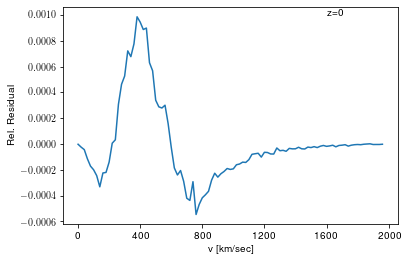

In [10]:
# plt.figure(figsize=(10,10))

a0,_ = np.histogram([i for i in mvx0],density=True,bins=np.linspace(0, 2000, 100))
b0,_ = np.histogram([i for i in vx0],density=True,bins=np.linspace(0, 2000, 100))
diff0 = a0 - b0
plt.plot(diff0)

plt.xlabel('v [km/sec]')
plt.ylabel('Rel. Residual')
plt.text(80,0.0010,'z=0')
plt.xticks([0,20,40,60,80,100], ['0','400','800','1200','1600','2000'])
plt.savefig('_vx0.png')
plt.show()

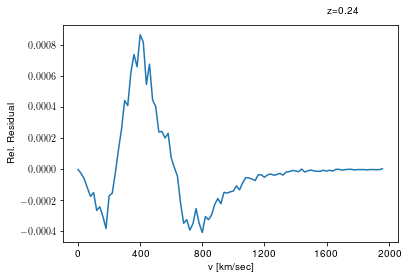

In [11]:
# plt.figure(figsize=(10,10))

a024,_ = np.histogram([i for i in mvx024],density=True,bins=np.linspace(0, 2000, 100))
b024,_ = np.histogram([i for i in vx024],density=True,bins=np.linspace(0, 2000, 100))
diff024 = a024 - b024
plt.plot(diff024)

plt.xlabel('v [km/sec]')
plt.ylabel('Rel. Residual')
plt.text(80,0.0010,'z=0.24')
plt.xticks([0,20,40,60,80,100], ['0','400','800','1200','1600','2000'])
plt.savefig('_vx024.png')
plt.show()

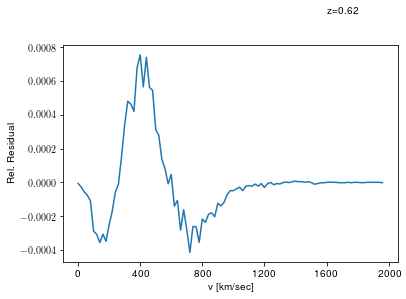

In [12]:
# plt.figure(figsize=(10,10))

a062,_ = np.histogram([i for i in mvx062],density=True,bins=np.linspace(0, 2000, 100))
b062,_ = np.histogram([i for i in vx062],density=True,bins=np.linspace(0, 2000, 100))
diff062 = a062 - b062
plt.plot(diff062)

plt.xlabel('v [km/sec]')
plt.ylabel('Rel. Residual')
plt.text(80,0.0010,'z=0.62')
plt.xticks([0,20,40,60,80,100], ['0','400','800','1200','1600','2000'])
plt.savefig('_vx062.png')
plt.show()

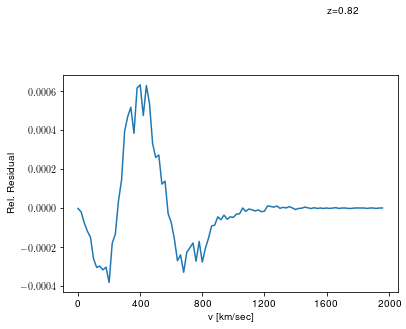

In [13]:
# plt.figure(figsize=(10,10))

a082,_ = np.histogram([i for i in mvx082],density=True,bins=np.linspace(0, 2000, 100))
b082,_ = np.histogram([i for i in vx082],density=True,bins=np.linspace(0, 2000, 100))
diff082 = a082 - b082
plt.plot(diff082)

plt.xlabel('v [km/sec]')
plt.ylabel('Rel. Residual')
plt.text(80,0.0010,'z=0.82')
plt.xticks([0,20,40,60,80,100], ['0','400','800','1200','1600','2000'])
plt.savefig('_vx082.png')
plt.show()

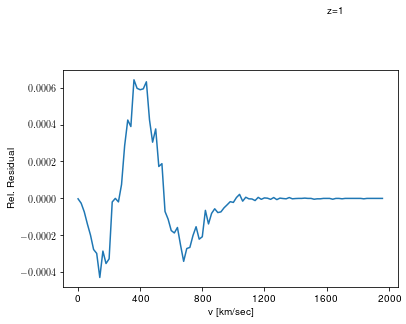

In [14]:
# plt.figure(figsize=(10,10))

a1,_ = np.histogram([i for i in mvx1],density=True,bins=np.linspace(0, 2000, 100))
b1,_ = np.histogram([i for i in vx1],density=True,bins=np.linspace(0, 2000, 100))
diff1 = a1 - b1
plt.plot(diff1)

plt.xlabel('v [km/sec]')
plt.ylabel('Rel. Residual')
plt.text(80,0.0010,'z=1')
plt.xticks([0,20,40,60,80,100], ['0','400','800','1200','1600','2000'])
plt.savefig('_vx1.png')
plt.show()

# Spin

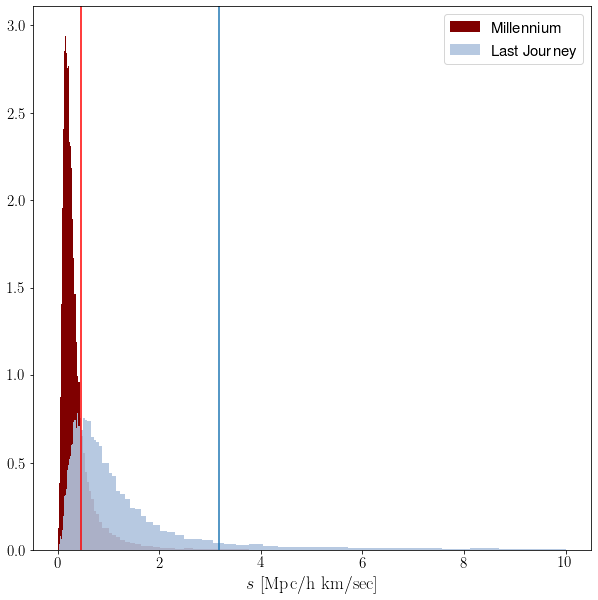

In [16]:
plt.figure(figsize=(10,10))
plt.axvline(np.mean([i for i in mspin0]),c='red')
plt.axvline(np.mean([i for i in spin0]))
bins=np.logspace(-2,1,100)
plt.hist([i for i in mspin0],density=True,bins=bins,color='maroon',label='Millennium')
plt.hist([i for i in spin0],density=True,bins=bins,color='lightsteelblue',label='Last Journey',alpha=0.9)
plt.legend()

plt.legend(prop={'size':15})
plt.xticks(size=15)
plt.yticks(size=15)
# plt.xlim(-1,30)

# plt.yscale('log')
# plt.xscale('log')
plt.xlabel('$s\,\,\mathrm{[Mpc/h\,\,km/sec]}$',size=18)
plt.savefig('_sv0.png')
plt.show()

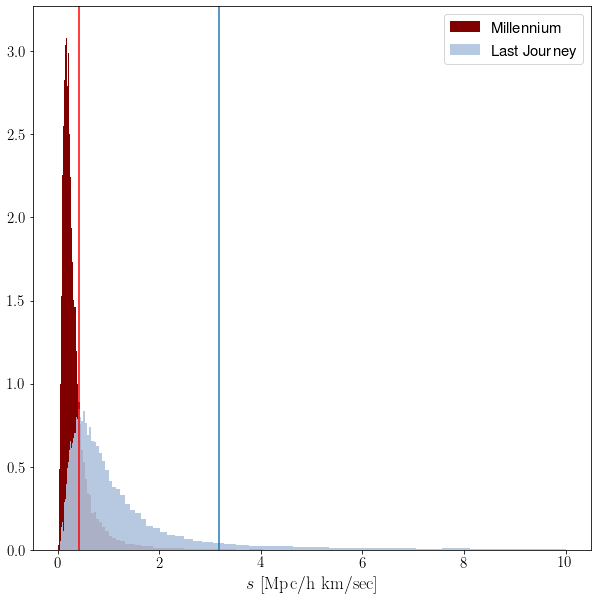

In [17]:
plt.figure(figsize=(10,10))
plt.axvline(np.mean([i for i in mspin024]),c='red')
plt.axvline(np.mean([i*(1/(1+0.24)**0) for i in spin024]))
bins=np.logspace(-2,1,100)
plt.hist([i for i in mspin024],density=True,bins=bins,color='maroon',label='Millennium')
plt.hist([i*(1/(1+0.24)**0) for i in spin024],density=True,bins=bins,color='lightsteelblue',label='Last Journey',alpha=0.9)
plt.legend()

plt.legend(prop={'size':15})
plt.xticks(size=15)
plt.yticks(size=15)
# plt.xlim(0,10)

#plt.xscale('log')
plt.xlabel('$s\,\,\mathrm{[Mpc/h\,\,km/sec]}$',size=18)
plt.savefig('_sv024.png')
plt.show()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


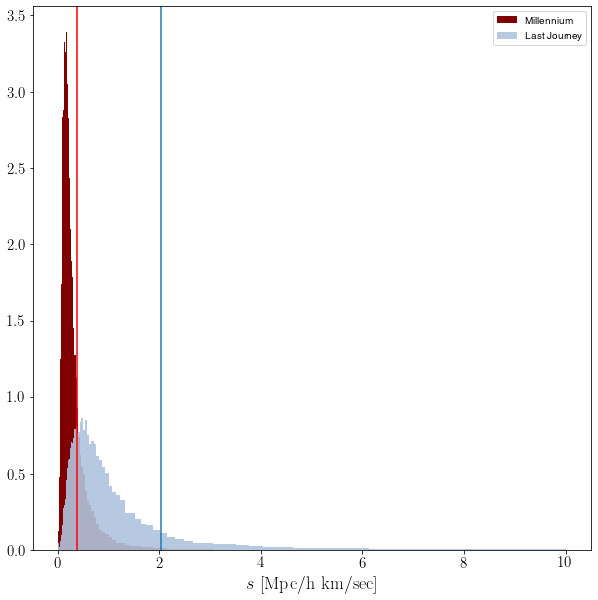

In [18]:
plt.figure(figsize=(10,10))
plt.axvline(np.mean([i for i in mspin062]),c='red')
plt.axvline(np.mean([i*(1/(1+0.62)**0) for i in spin062]))
bins=np.logspace(-2,1,100)
plt.hist([i for i in mspin062],density=True,bins=bins,color='maroon',label='Millennium')
plt.hist([i*(1/(1+0.62)**0) for i in spin062],density=True,bins=bins,color='lightsteelblue',label='Last Journey',alpha=0.9)
plt.legend()

plt.xticks(size=15)
plt.yticks(size=15)
#plt.xlim(0,30)

#plt.xscale('log')
plt.xlabel('$s\,\,\mathrm{[Mpc/h\,\,km/sec]}$',size=18)
plt.savefig('_sv062.png')
plt.show()

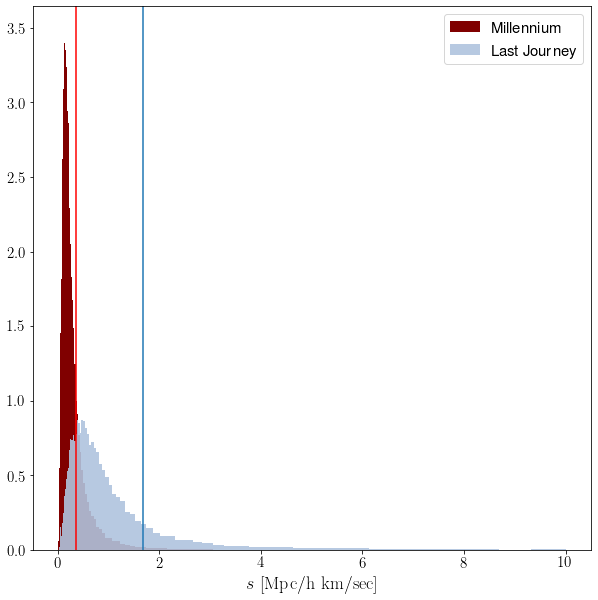

In [19]:
plt.figure(figsize=(10,10))
plt.axvline(np.mean([i for i in mspin082]),c='red')
plt.axvline(np.mean([i*(1/(1+0.82)**0) for i in spin082]))
bins=np.logspace(-2,1,100)
plt.hist([i for i in mspin082],density=True,bins=bins,color='maroon',label='Millennium')
plt.hist([i*(1/(1+0.82)**0) for i in spin082],density=True,bins=bins,color='lightsteelblue',label='Last Journey',alpha=0.9)

plt.legend(prop={'size':15})
plt.xticks(size=15)
plt.yticks(size=15)
#plt.xlim(0,30)

#plt.xscale('log')
plt.xlabel('$s\,\,\mathrm{[Mpc/h\,\,km/sec]}$',size=18)
plt.savefig('_sv082.png')
plt.show()

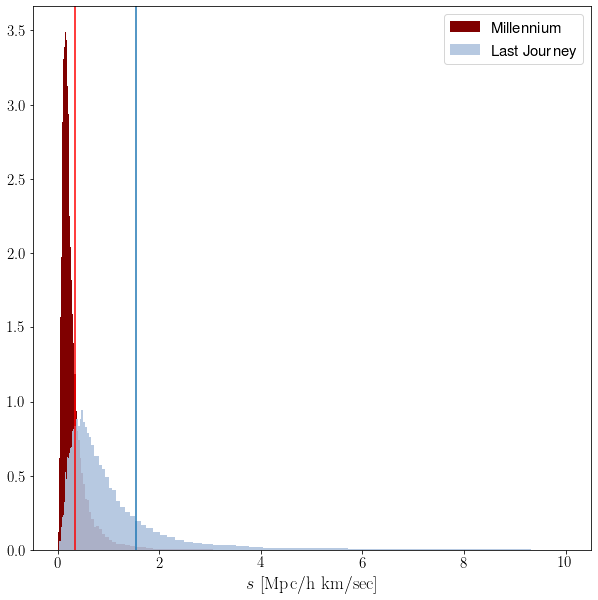

In [20]:
plt.figure(figsize=(10,10))
plt.axvline(np.mean([i for i in mspin1]),c='red')
plt.axvline(np.mean([i*(1/(1+1)**0) for i in spin1]))
bins=np.logspace(-2,1,100)
plt.hist([i for i in mspin1],density=True,bins=bins,color='maroon',label='Millennium')
plt.hist([i*(1/(1+1)**0) for i in spin1],density=True,bins=bins,color='lightsteelblue',label='Last Journey',alpha=0.9)

plt.legend(prop={'size':15})
plt.xticks(size=15)
plt.yticks(size=15)
#plt.xlim(0,30)

#plt.xscale('log')
plt.xlabel('$s\,\,\mathrm{[Mpc/h\,\,km/sec]}$',size=18)
plt.savefig('_sv1.png')
plt.show()

---

# VelDisp

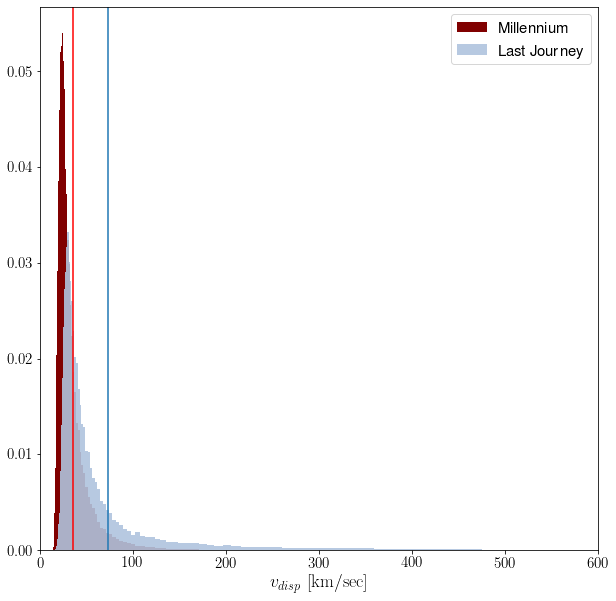

In [36]:
plt.figure(figsize=(10,10))
plt.axvline(np.mean([i for i in mvdis0]),c='red')
plt.axvline(np.mean([i for i in vdis0]))
bins=np.logspace(1,3,100)
plt.hist([i for i in mvdis0],density=True,bins=bins,color='maroon',label='Millennium')
plt.hist([i for i in vdis0],density=True,bins=bins,color='lightsteelblue',label='Last Journey',alpha=0.9)
plt.legend()
plt.xlim(0,600)
plt.legend(prop={'size':15})
plt.xticks(size=15)
plt.yticks(size=15)
#plt.xscale('log')
plt.xlabel('$v_{disp}\,\,\mathrm{[km/sec]}$',size=18)
plt.savefig('_vdz0.png')

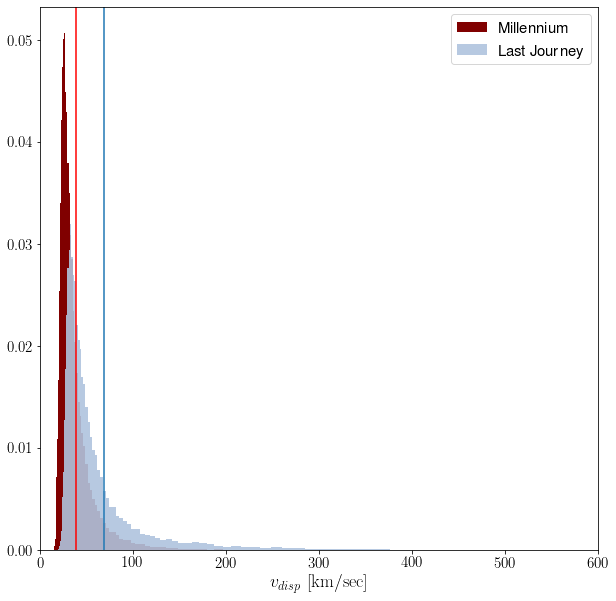

In [37]:
plt.figure(figsize=(10,10))
plt.axvline(np.mean([i for i in mvdis024]),c='red')
plt.axvline(np.mean([i*(1/(1+0.24))**0 for i in vdis024]))
bins=np.logspace(1,3,100)
plt.hist([i for i in mvdis024],density=True,bins=bins,color='maroon',label='Millennium')
plt.hist([i*(1/(1+0.24))**0 for i in vdis024],density=True,bins=bins,color='lightsteelblue',label='Last Journey',alpha=0.9)
plt.legend()
plt.xlim(0,600)
plt.legend(prop={'size':15})
plt.xticks(size=15)
plt.yticks(size=15)
#plt.xscale('log')
plt.xlabel('$v_{disp}\,\,\mathrm{[km/sec]}$',size=18)

plt.savefig('_vdz024.png')

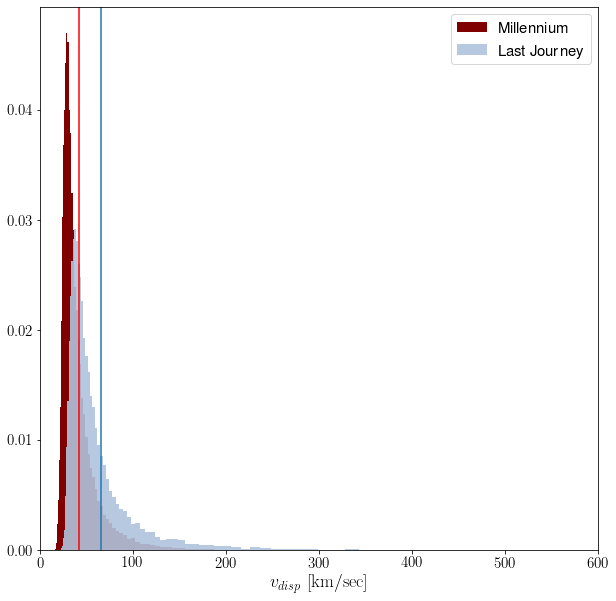

In [38]:
plt.figure(figsize=(10,10))
plt.axvline(np.mean([i for i in mvdis062]),c='red')
plt.axvline(np.mean([i*(1/(1+0.62))**0 for i in vdis062]))
bins=np.logspace(1,3,100)
plt.hist([i for i in mvdis062],density=True,bins=bins,color='maroon',label='Millennium')
plt.hist([i*(1/(1+0.62))**0 for i in vdis062],density=True,bins=bins,color='lightsteelblue',label='Last Journey',alpha=0.9)
plt.legend()
plt.xlim(0,600)
plt.legend(prop={'size':15})
plt.xticks(size=15)
plt.yticks(size=15)
#plt.xscale('log')
plt.xlabel('$v_{disp}\,\,\mathrm{[km/sec]}$',size=18)

plt.savefig('_vdz062.png')

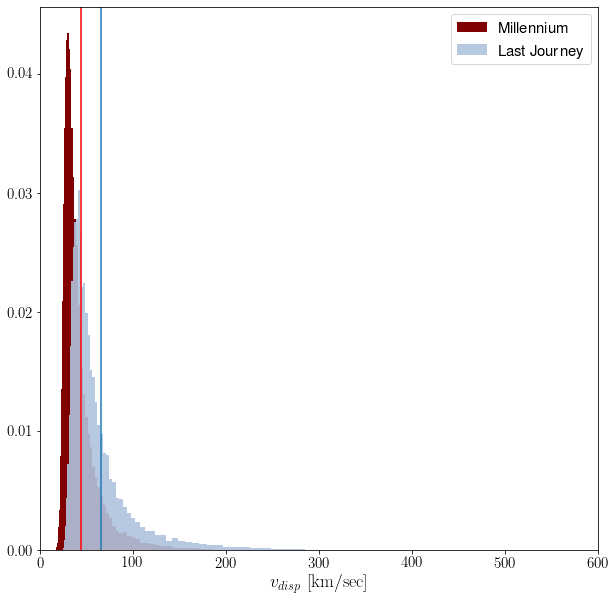

In [39]:
plt.figure(figsize=(10,10))
plt.axvline(np.mean([i for i in mvdis082]),c='red')
plt.axvline(np.mean([i*(1/(1+0.82))**0 for i in vdis082]))
bins=np.logspace(1,3,100)
plt.hist([i for i in mvdis082],density=True,bins=bins,color='maroon',label='Millennium')
plt.hist([i*(1/(1+0.82))**0 for i in vdis082],density=True,bins=bins,color='lightsteelblue',label='Last Journey',alpha=0.9)
plt.legend()
plt.xlim(0,600)
plt.legend(prop={'size':15})
plt.xticks(size=15)
plt.yticks(size=15)
#plt.xscale('log')
plt.xlabel('$v_{disp}\,\,\mathrm{[km/sec]}$',size=18)

plt.savefig('_vdz082.png')

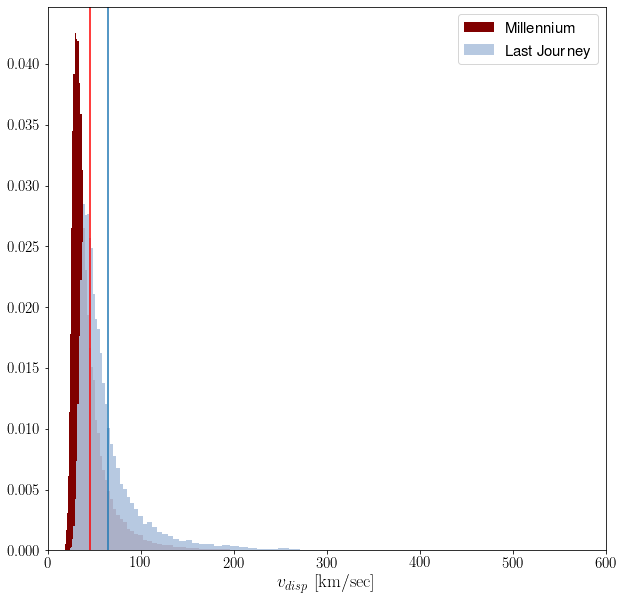

In [40]:
plt.figure(figsize=(10,10))
plt.axvline(np.mean([i for i in mvdis1]),c='red')
plt.axvline(np.mean([i*(1/(1+1))**0 for i in vdis1]))
bins=np.logspace(1,3,100)
plt.hist([i for i in mvdis1],density=True,bins=bins,color='maroon',label='Millennium')
plt.hist([i*(1/(1+1))**0 for i in vdis1],density=True,bins=bins,color='lightsteelblue',label='Last Journey',alpha=0.9)
plt.legend()
plt.xlim(0,600)
plt.legend(prop={'size':15})
plt.xticks(size=15)
plt.yticks(size=15)
#plt.xscale('log')
plt.xlabel('$v_{disp}\,\,\mathrm{[km/sec]}$',size=18)

plt.savefig('_vdz1.png')

---

# Vmax

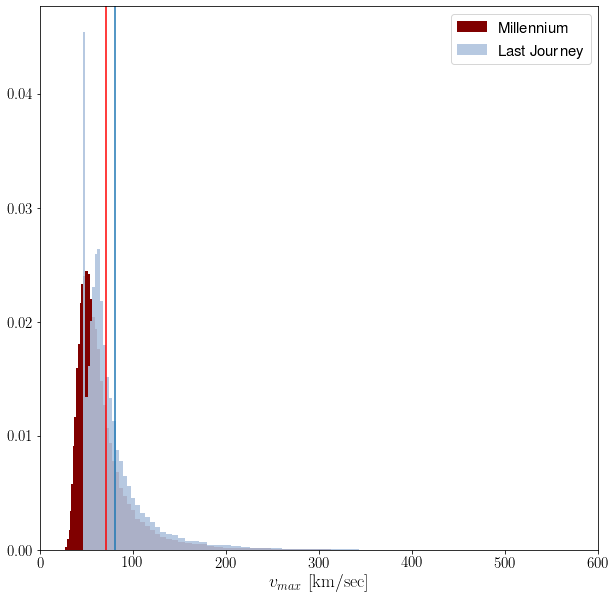

In [41]:
plt.figure(figsize=(10,10))
plt.axvline(np.mean([i for i in mvmax0]),c='red')
plt.axvline(np.mean([i for i in vmax0]))
bins=np.logspace(1,3,100)
plt.hist([i for i in mvmax0],density=True,bins=bins,color='maroon',label='Millennium')
plt.hist([i for i in vmax0],density=True,bins=bins,color='lightsteelblue',label='Last Journey',alpha=0.9)
plt.legend()
plt.xlim(0,600)
plt.legend(prop={'size':15})
plt.xticks(size=15)
plt.yticks(size=15)
#plt.xscale('log')
plt.xlabel('$v_{max}\,\,\mathrm{[km/sec]}$',size=18)
# #plt.xscale('log')
# plt.yscale('log')
plt.savefig('_vmaxz0.png')

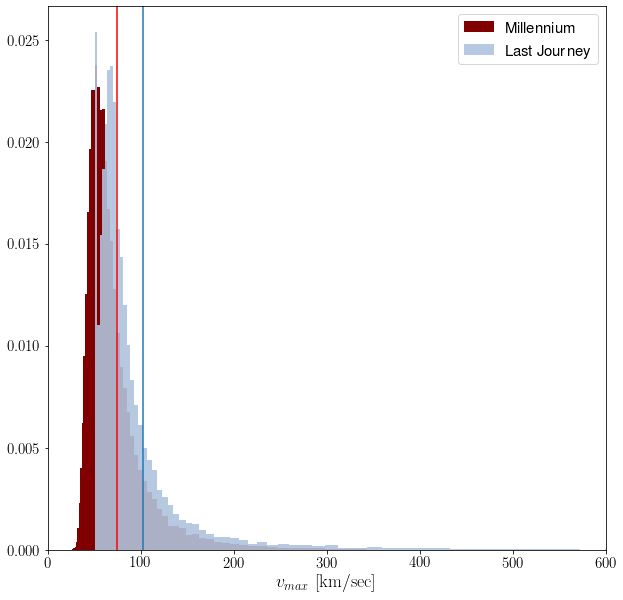

In [42]:
plt.figure(figsize=(10,10))
plt.axvline(np.mean([i for i in mvmax024]),c='red')
plt.axvline(np.mean([i*(1/(1/(1+0.24))**(0)) for i in vmax024]))
bins=np.logspace(1,3,100)
plt.hist([i for i in mvmax024],density=True,bins=bins,color='maroon',label='Millennium')
plt.hist([i*(1/(1/(1+0.24))**(0)) for i in vmax024],density=True,bins=bins,color='lightsteelblue',label='Last Journey',alpha=0.9)
plt.legend()
plt.xlim(0,600)
plt.legend(prop={'size':15})
plt.xticks(size=15)
plt.yticks(size=15)
#plt.xscale('log')
plt.xlabel('$v_{max}\,\,\mathrm{[km/sec]}$',size=18)

plt.savefig('_vmaxz024.png')

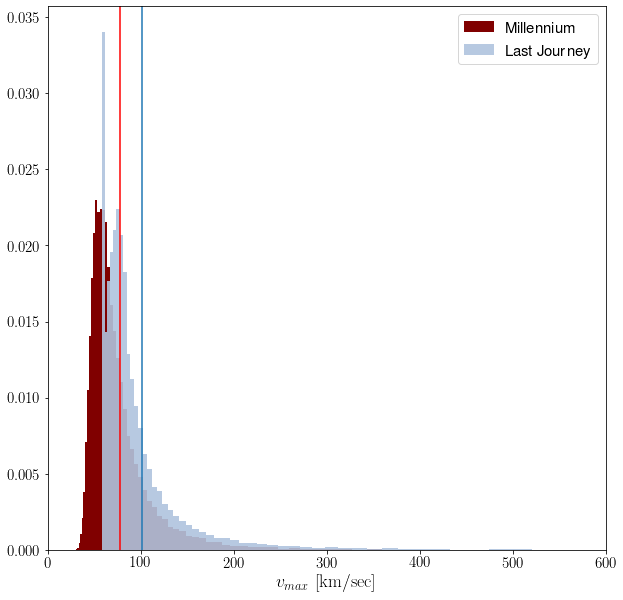

In [43]:
plt.figure(figsize=(10,10))
plt.axvline(np.mean([i for i in mvmax062]),c='red')
plt.axvline(np.mean([i*(1/(1/(1+0.62))**(0)) for i in vmax062]))
bins=np.logspace(1,3,100)
plt.hist([i for i in mvmax062],density=True,bins=bins,color='maroon',label='Millennium')
plt.hist([i*(1/(1/(1+0.62))**(0)) for i in vmax062],density=True,bins=bins,color='lightsteelblue',label='Last Journey',alpha=0.9)
plt.legend()
plt.xlim(0,600)
plt.legend(prop={'size':15})
plt.xticks(size=15)
plt.yticks(size=15)
#plt.xscale('log')
plt.xlabel('$v_{max}\,\,\mathrm{[km/sec]}$',size=18)

plt.savefig('_vmaxz062.png')

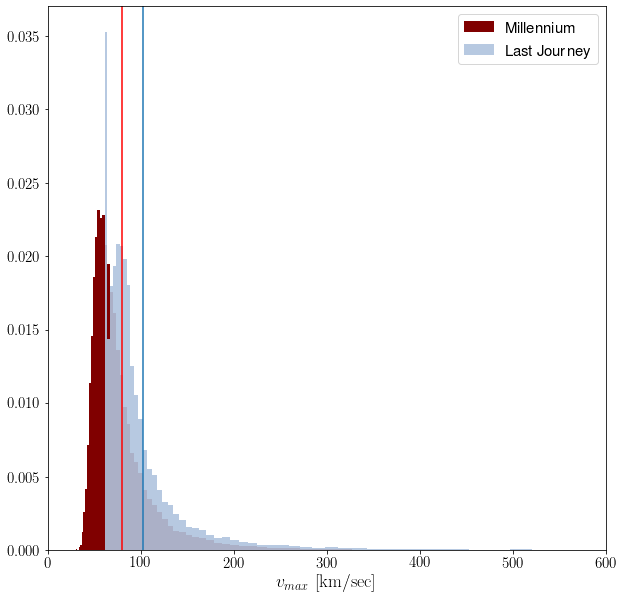

In [44]:
plt.figure(figsize=(10,10))
plt.axvline(np.mean([i for i in mvmax082]),c='red')
plt.axvline(np.mean([i*(1/(1/(1+0.82))**(0)) for i in vmax082]))
bins=np.logspace(1,3,100)
plt.hist([i for i in mvmax082],density=True,bins=bins,color='maroon',label='Millennium')
plt.hist([i*(1/(1/(1+0.82))**(0)) for i in vmax082],density=True,bins=bins,color='lightsteelblue',label='Last Journey',alpha=0.9)
plt.legend()
plt.xlim(0,600)
plt.legend(prop={'size':15})
plt.xticks(size=15)
plt.yticks(size=15)
#plt.xscale('log')
plt.xlabel('$v_{max}\,\,\mathrm{[km/sec]}$',size=18)

plt.savefig('_vmaxz082.png')

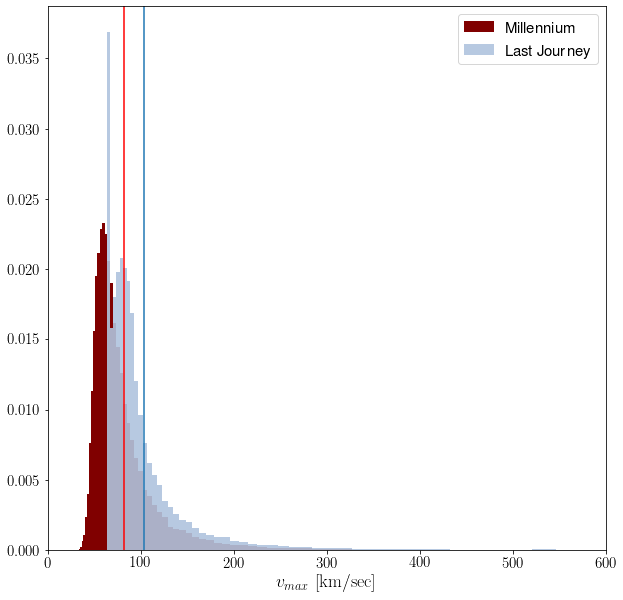

In [47]:
plt.figure(figsize=(10,10))
plt.axvline(np.mean([i for i in mvmax1]),c='red')
plt.axvline(np.mean([i*(1/(1/(1+1))**(0)) for i in vmax1]))
bins=np.logspace(1,3,100)
plt.hist([i for i in mvmax1],density=True,bins=bins,color='maroon',label='Millennium')
plt.hist([i*(1/(1/(1+1))**(0)) for i in vmax1],density=True,bins=bins,color='lightsteelblue',label='Last Journey',alpha=0.9)
plt.legend()
plt.xlim(0,600)
plt.legend(prop={'size':15})
plt.xticks(size=15)
plt.yticks(size=15)
#plt.xscale('log')
plt.xlabel('$v_{max}\,\,\mathrm{[km/sec]}$',size=18)

plt.savefig('_vmaxz1.png')

---

# Differences

In [ ]:
zs = [0.,0.24,0.62,0.82,1.,2.,3.]
z0diff = np.mean(np.log10([i for i in spin0]))-np.mean(np.log10([i for i in mspin0]))
z024diff = np.mean(np.log10([i*(1/(1+0.24)**2) for i in spin024]))-np.mean(np.log10([i for i in mspin024]))
z062diff = np.mean(np.log10([i*(1/(1+0.62)**2) for i in spin062]))-np.mean(np.log10([i for i in mspin062]))
z082diff = np.mean(np.log10([i*(1/(1+0.82)**2) for i in spin082]))-np.mean(np.log10([i for i in mspin082]))
z1diff = np.mean(np.log10([i*(1/(1+1.)**2) for i in spin1]))-np.mean(np.log10([i for i in mspin1]))
z2diff = np.mean(np.log10([i*(1/(1+2.)**2) for i in spin2]))-np.mean(np.log10([i for i in mspin2]))
z3diff = np.mean(np.log10([i*(1/(1+3.)**2) for i in spin3]))-np.mean(np.log10([i for i in mspin3]))

In [ ]:
plt.scatter(zs,[z0diff,z024diff,z062diff,z082diff,z1diff,z2diff,z2diff])
plt.ylabel('LJDS-Mill')
plt.xlabel('z')

In [ ]:
zs = [0.,0.24,0.62,0.82,1.,2.,3.]
z0diff = np.mean(np.log10([i for i in vdis0]))-np.mean(np.log10([i for i in mvdis0]))
z024diff = np.mean(np.log10([i*(1/(1+0.24)**1) for i in vdis024]))-np.mean(np.log10([i for i in mvdis024]))
z062diff = np.mean(np.log10([i*(1/(1+0.62)**1) for i in vdis062]))-np.mean(np.log10([i for i in mvdis062]))
z082diff = np.mean(np.log10([i*(1/(1+0.82)**1) for i in vdis082]))-np.mean(np.log10([i for i in mvdis082]))
z1diff = np.mean(np.log10([i*(1/(1+1.)**1) for i in vdis1]))-np.mean(np.log10([i for i in mvdis1]))
z2diff = np.mean(np.log10([i*(1/(1+2.)**1) for i in vdis2]))-np.mean(np.log10([i for i in mvdis2]))
z3diff = np.mean(np.log10([i*(1/(1+3.)**1) for i in vdis3]))-np.mean(np.log10([i for i in mvdis3]))

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(zs,[z0diff,z024diff,z062diff,z082diff,z1diff,z2diff,z2diff])
plt.ylabel('$v_{LJ}-v_{M}$',size=20)
plt.xlabel('$z$',size=20)

---

# Mass comp

In [ ]:
plt.figure(figsize=(10,10))
# bins=np.linspace(430000000000.0,1e15,1000)
bins=np.logspace(11,15, 100)
# plt.axvline(500)
plt.hist([i for i in mleng if i!=0],density=True,bins=bins,color='maroon',label='Millennium: Len',alpha=0.8)
plt.hist([i for i in mmcrit if i!=0],density=True,bins=bins,color='grey',label='Millennium: MCrit',alpha=0.8)
plt.hist([i for i in leng if i!=0],density=True,bins=bins,color='lightsteelblue',label='LJ: Len',alpha=0.8)
plt.hist([i for i in mcrit if i!=0],density=True,bins=bins,color='grey',label='LJ: MCrit',alpha=0.8)
plt.legend(prop={'size':15})
# plt.text(4,2,"Len",size=12)
plt.xlim(1e11,1e15)
plt.xticks(size=15)
plt.yticks(size=15)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('$M_{crit}$',size=18)
plt.show()
# plt.savefig('fofsodcomp.png')

In [ ]:
mmcrit=np.array(mmcrit)
min(mmcrit[mmcrit>0]/8.6e8)

---